In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
color = sns.color_palette()

import matplotlib.pyplot as plt
%matplotlib inline

from ggplot import *

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
#players with social media influence power, wiki, twitter & PIE, performance
sp_df = pd.read_csv("../input/nba_2017_players_with_salary_wiki_twitter.csv");sp_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [3]:
sp_df.drop(['Unnamed: 0'],axis=1, inplace = True)

In [4]:
sp_df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rk,239,NaN,NaN,NaN,195.402,133.472,1,77.5,173,306.5,475
PLAYER,239,238,Bobby Portis,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSITION,239,5,PF,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,239,NaN,NaN,NaN,26.4059,4.43327,19,23,26,29,40
MP,239,NaN,NaN,NaN,23.1397,8.52596,4.4,16.35,24,30.6,37.8
FG,239,NaN,NaN,NaN,3.84351,2.28039,0.2,2,3.4,5.2,10.3
FGA,239,NaN,NaN,NaN,8.48201,4.7956,1.1,4.75,7.6,11.25,24
FG%,239,NaN,NaN,NaN,0.447686,0.0709736,0.2,0.405,0.444,0.4775,0.671
3P,239,NaN,NaN,NaN,0.95272,0.805798,0,0.3,0.8,1.5,4.1
3PA,239,NaN,NaN,NaN,2.6728,2.06607,0,1,2.4,3.95,10


In [5]:
# fillin NAN
sp_df['TWITTER_FAVORITE_COUNT'] = sp_df['TWITTER_FAVORITE_COUNT'].fillna(np.mean(sp_df['TWITTER_FAVORITE_COUNT'])).astype(int)
sp_df['TWITTER_RETWEET_COUNT'] = sp_df['TWITTER_RETWEET_COUNT'].fillna(np.mean(sp_df['TWITTER_RETWEET_COUNT'])).astype(int)

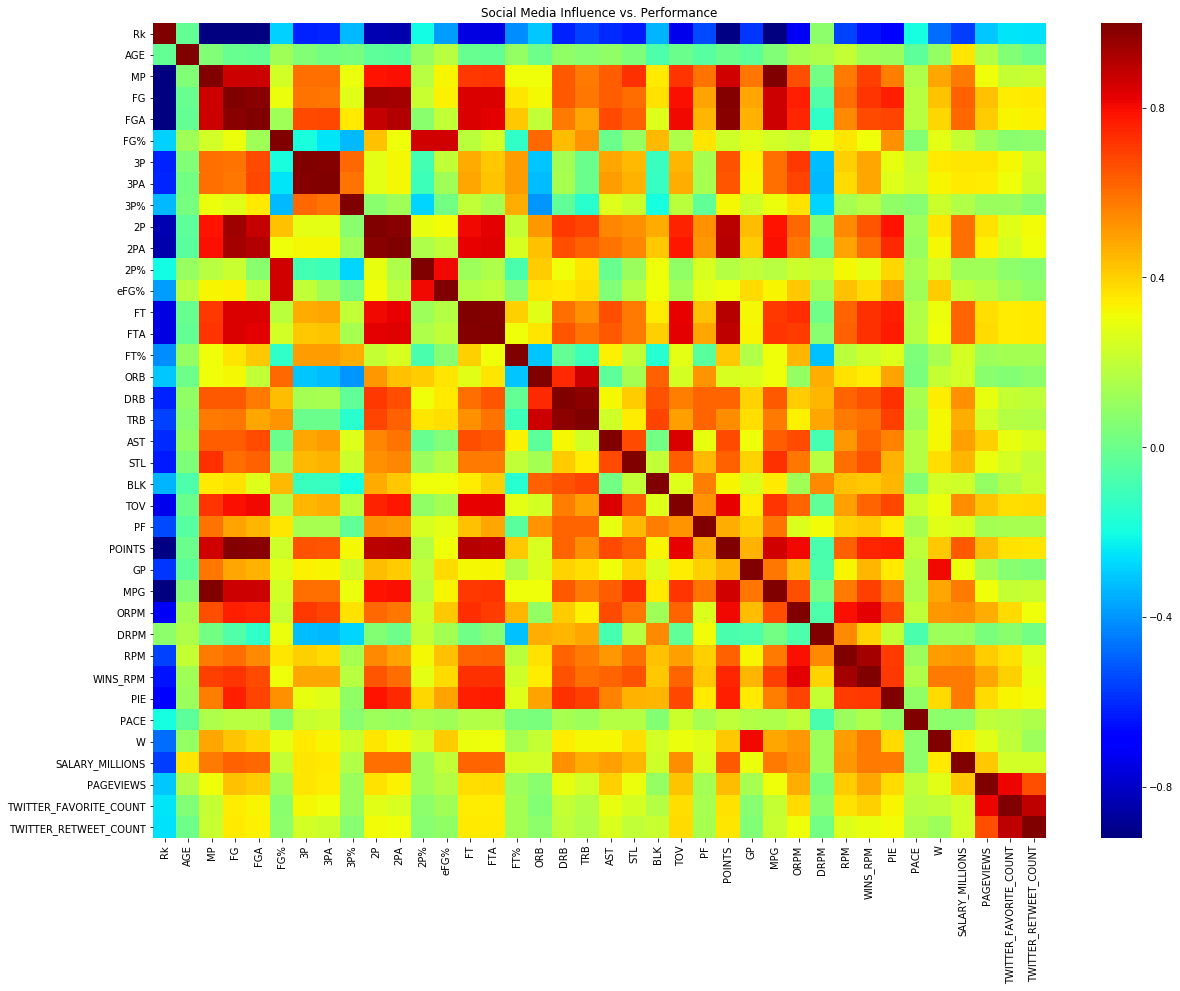

In [6]:
#correlation heatmap, selecting performance from 40 columns
fig, axis1 = plt.subplots(1,1,figsize=(20,15))
plt.title('Social Media Influence vs. Performance')
correlation = sp_df.corr()
sns.heatmap(correlation, xticklabels = correlation.columns.values, yticklabels = correlation.columns.values, cmap="jet")

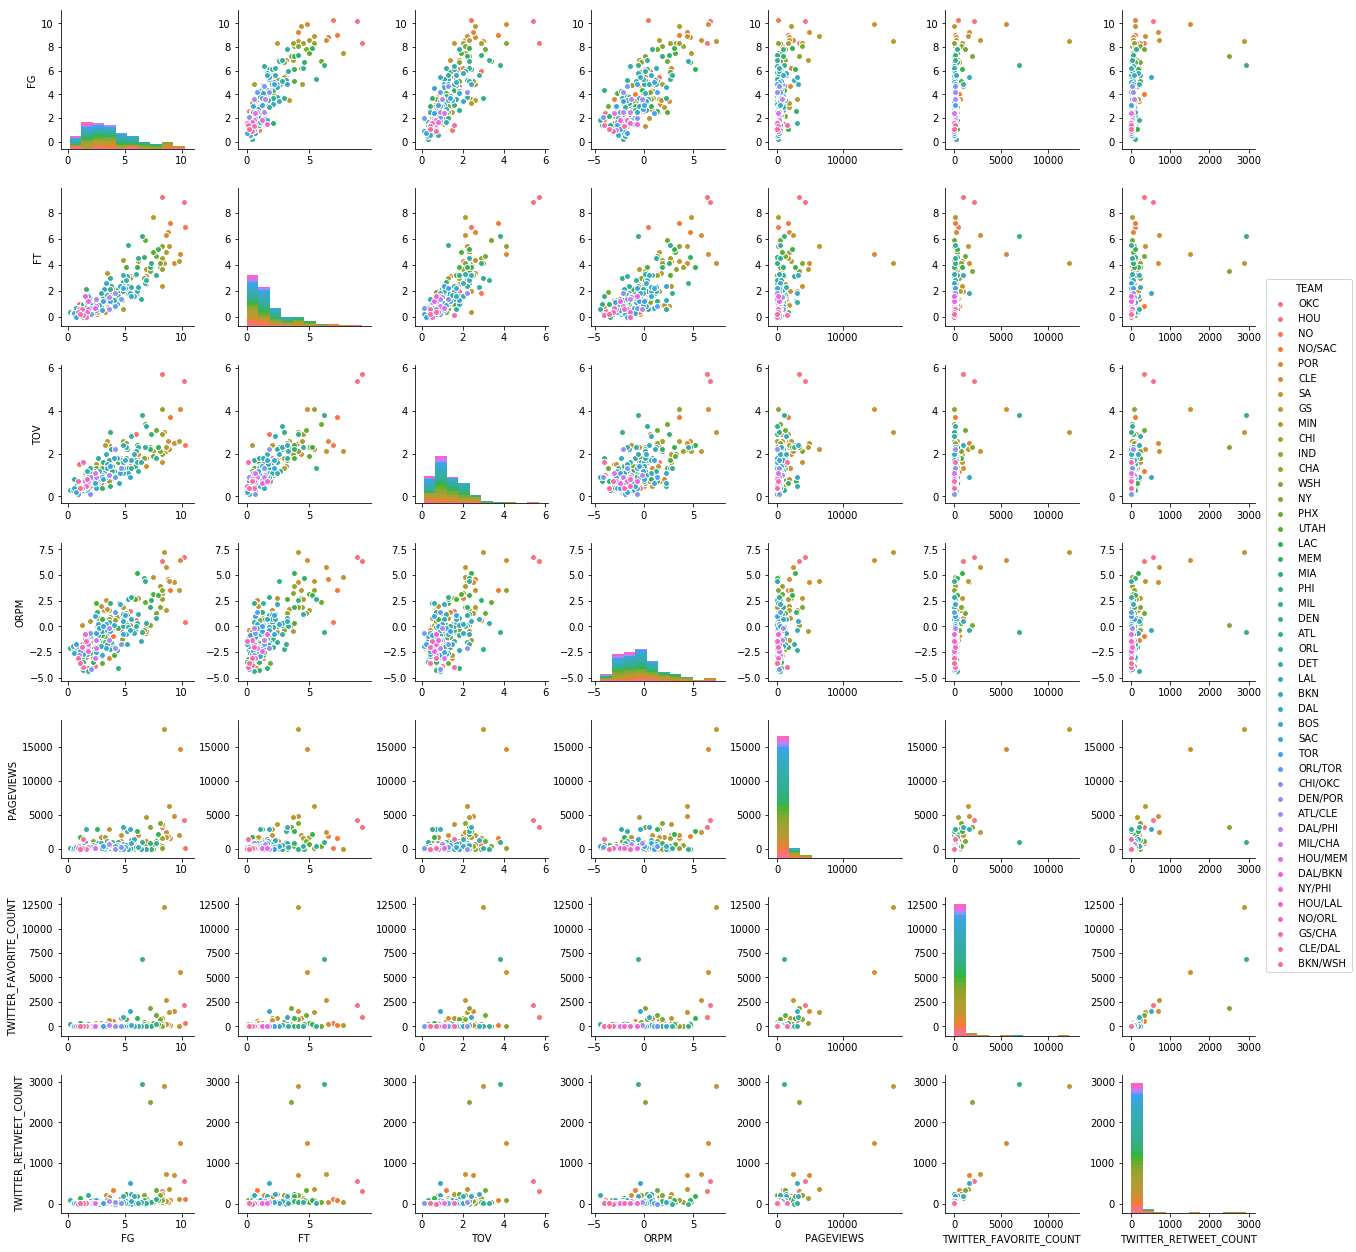

In [7]:
# pairpolt based on corr heatmap > 0.4
subcol1 = ['TEAM','FG','FT','TOV','ORPM','PAGEVIEWS','TWITTER_FAVORITE_COUNT','TWITTER_RETWEET_COUNT']
sub_df = sp_df[subcol1]
sns.pairplot(sub_df,hue="TEAM")


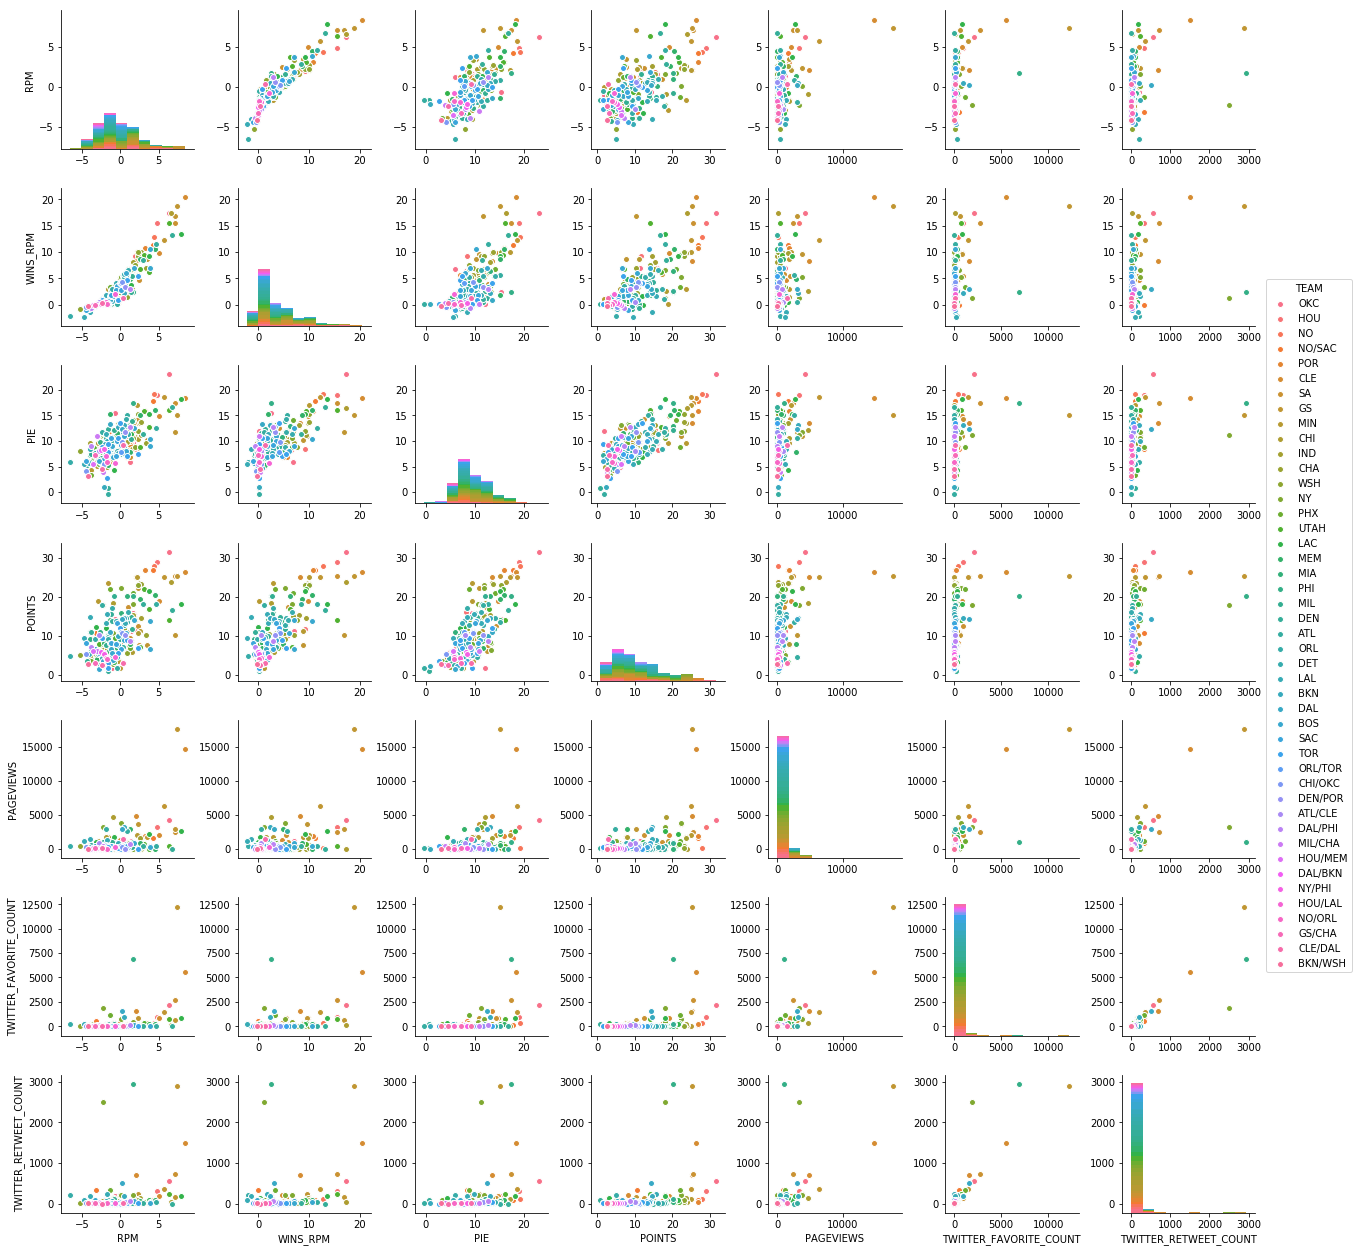

In [8]:
subcol2= ['TEAM','RPM','WINS_RPM','PIE','POINTS','PAGEVIEWS','TWITTER_FAVORITE_COUNT','TWITTER_RETWEET_COUNT']
sub_df2 = sp_df[subcol2]
sns.pairplot(sub_df2,hue="TEAM")

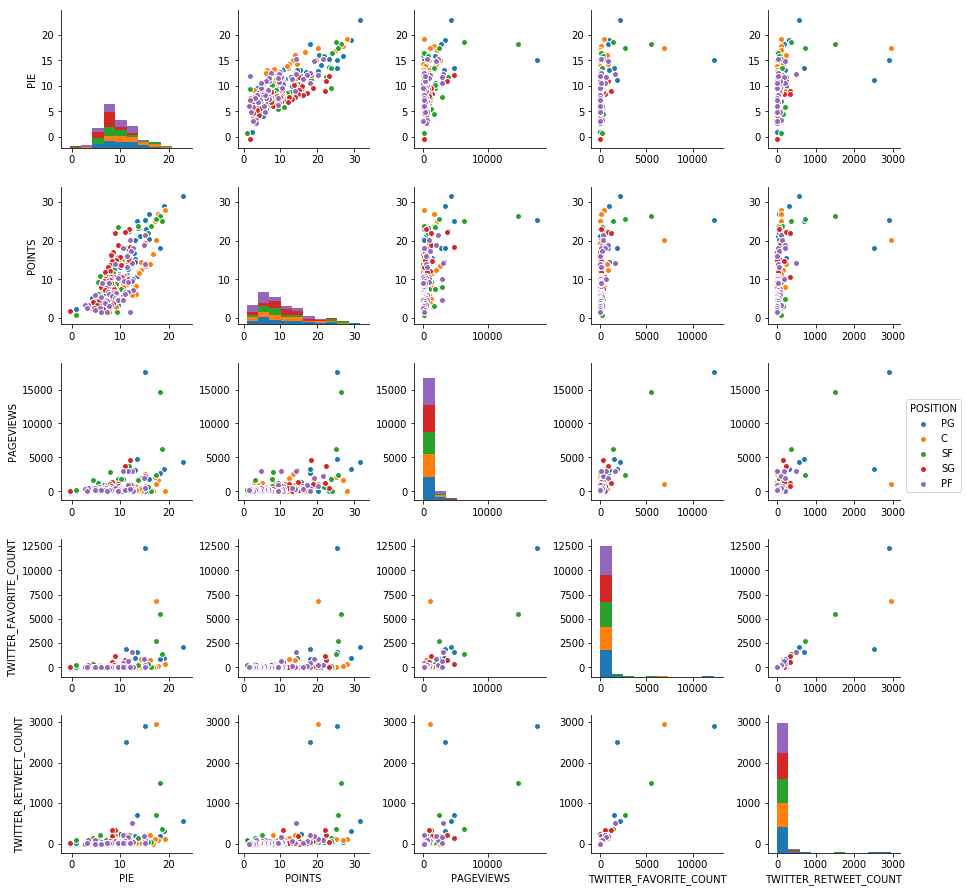

In [9]:
#narrow down
subcol3= ['POSITION','PIE','POINTS','PAGEVIEWS','TWITTER_FAVORITE_COUNT','TWITTER_RETWEET_COUNT']
sub_df3 = sp_df[subcol3]
sns.pairplot(sub_df3,hue="POSITION")

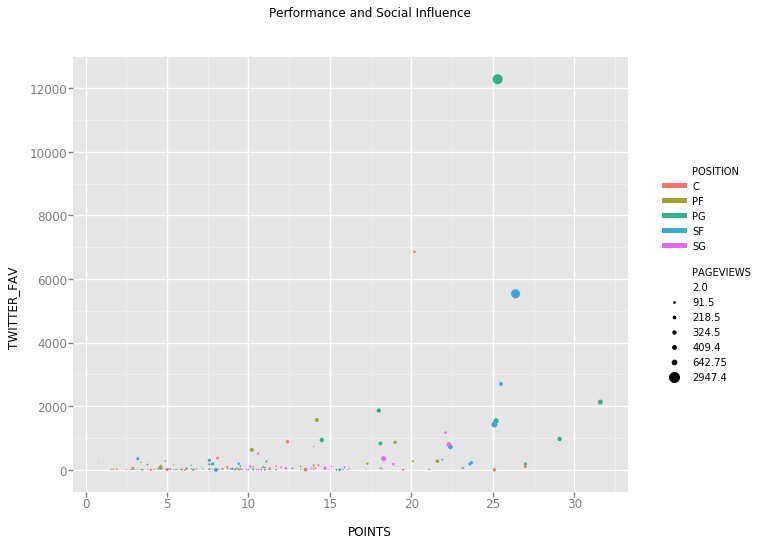

<ggplot: (-9223363250754939034)>

In [10]:
# players social influence - pageviews
p = ggplot(sp_df,aes(x="POINTS", y="TWITTER_FAVORITE_COUNT", color="POSITION",size="PAGEVIEWS")) + geom_point()
p + xlab("POINTS") + ylab("TWITTER_FAV") + ggtitle("Performance and Social Influence")

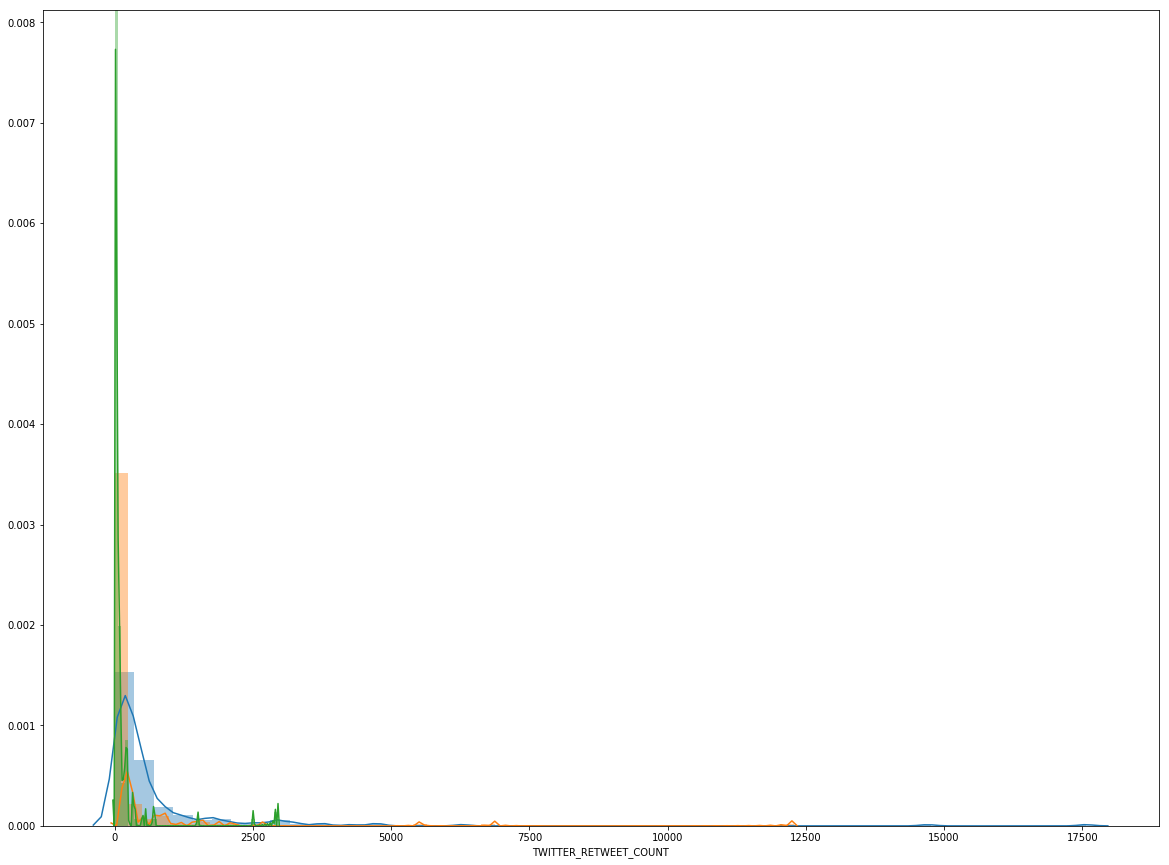

In [11]:
fig, axis1 = plt.subplots(1,1,figsize=(20,15))
sns.distplot(sp_df['PAGEVIEWS'])
sns.distplot(sp_df['TWITTER_FAVORITE_COUNT'])
sns.distplot(sp_df['TWITTER_RETWEET_COUNT']);

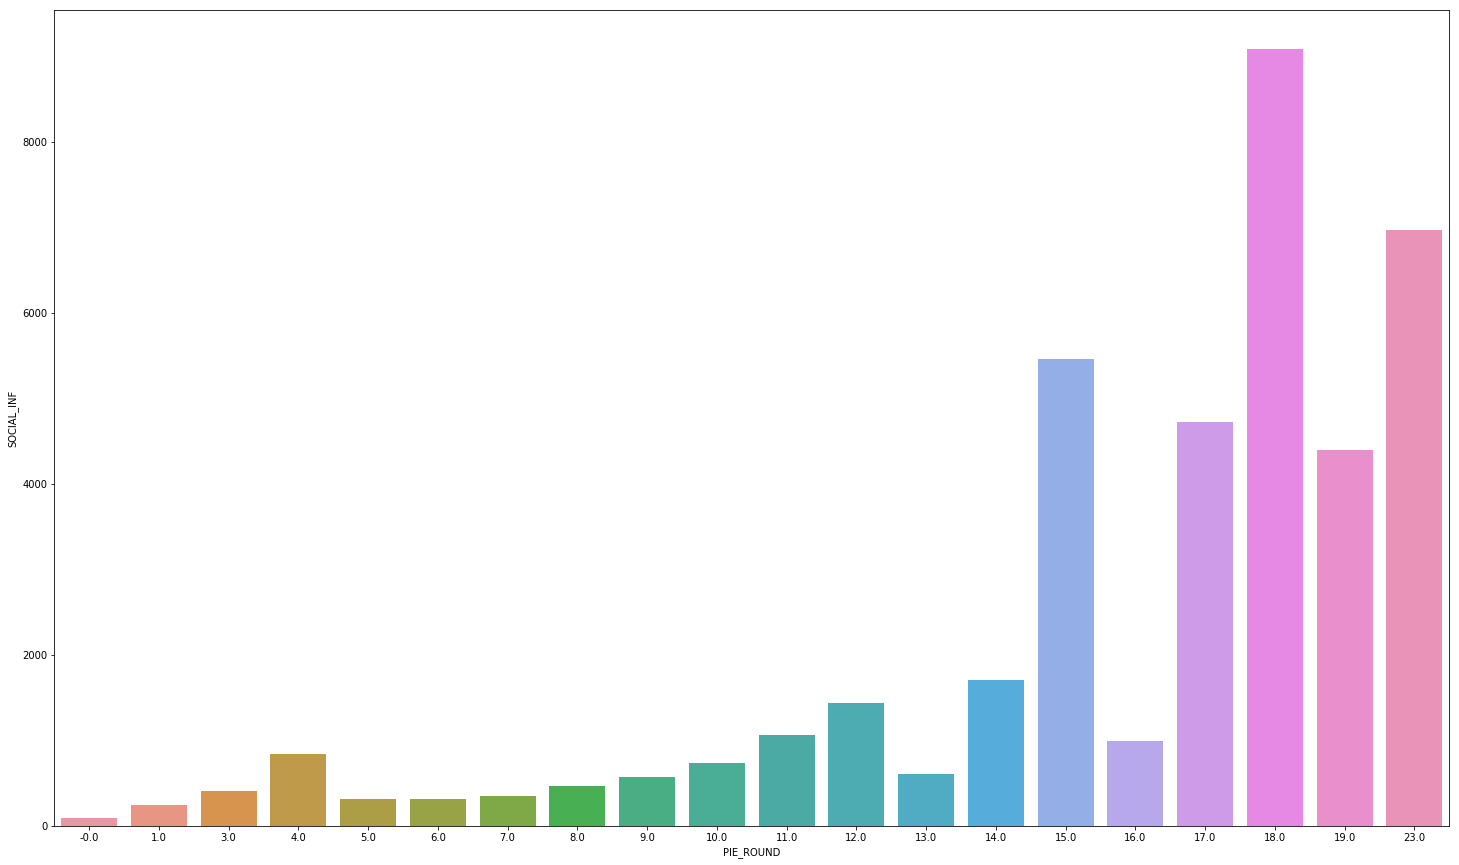

In [12]:
# avg social influence for different PIE level 
sp_df['SOCIAL_INF']= sp_df['PAGEVIEWS'] + sp_df['TWITTER_FAVORITE_COUNT']+ sp_df['TWITTER_RETWEET_COUNT']
sp_df['PIE_ROUND']= sp_df['PIE'].round()
fig, axis1 = plt.subplots(1,1,figsize=(25,15))
avg_socialinf = sp_df[["SOCIAL_INF","PIE_ROUND"]].groupby(['PIE_ROUND'],as_index=False).mean()
sns.barplot( x="PIE_ROUND", y= "SOCIAL_INF", data= avg_socialinf )
